In [95]:
json_synthetic_path = "/home/tlips/Documents/synthetic-cloth-data/state-estimation/state_estimation/keypoint_detection/akd/synthetic_tshirts.json"
json_real_path = "/home/tlips/Documents/synthetic-cloth-data/state-estimation/state_estimation/keypoint_detection/akd/real_tshirts.json"
json_finetuned_path = "/home/tlips/Documents/synthetic-cloth-data/state-estimation/state_estimation/keypoint_detection/akd/finetuned_synthetic_tshirts.json"
import json
import numpy as np
akd_dict = json.load(open(json_synthetic_path))
akd_dict_real = json.load(open(json_real_path))
akd_dict_finetuned = json.load(open(json_finetuned_path))

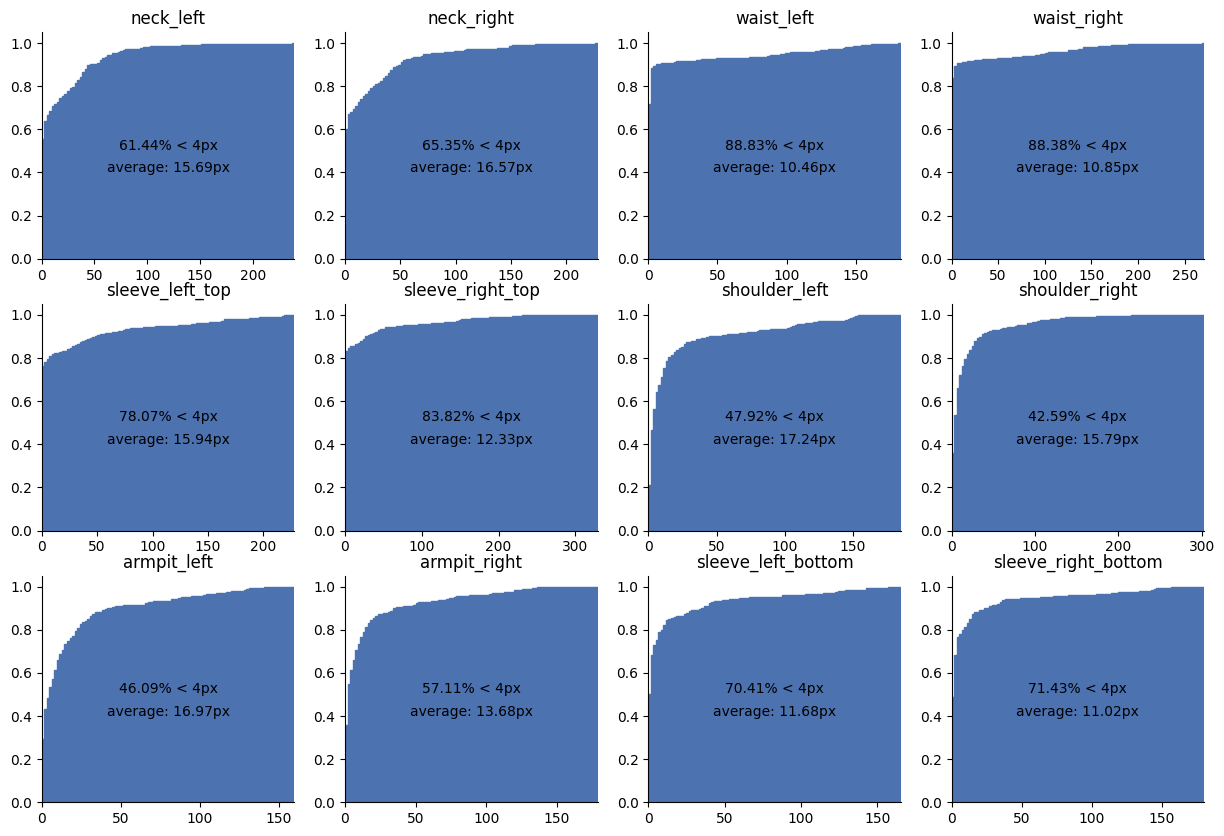

In [86]:
# plot relative frequency histogram for each channel of the akd errors
# make single figure for all

import matplotlib.pyplot as plt

N_per_column =4

treshold_to_show = 4

fig, axs = plt.subplots(len(akd_dict)//N_per_column,N_per_column, figsize=(15, 10))
for i, (k, v) in enumerate(akd_dict.items()):
    axs[i//N_per_column, i%N_per_column].hist(v, bins=100, density=True,cumulative=True)
    axs[i//N_per_column, i%N_per_column].set_title(k)
    # add a number of the percentage of errors below 8 
    percentage = len([x for x in v if x <= treshold_to_show])/len(v)*100
    axs[i//N_per_column, i%N_per_column].text(0.5, 0.5, f"{percentage:.2f}% < {treshold_to_show}px", horizontalalignment='center', verticalalignment='center', transform=axs[i//N_per_column][i%N_per_column].transAxes)
    # print the average
    average = np.mean(v)
    axs[i//N_per_column,i%N_per_column].text(0.5, 0.4, f"average: {average:.2f}px", horizontalalignment='center', verticalalignment='center', transform=axs[i//N_per_column][i%N_per_column].transAxes)
    
    # remove right and top spines
    axs[i//N_per_column, i%N_per_column].spines['right'].set_visible(False)
    axs[i//N_per_column, i%N_per_column].spines['top'].set_visible(False)

    # remove x margin 
    axs[i//N_per_column, i%N_per_column].margins(x=0)

    # change bar color  to deep color 0 of sns
    import seaborn as sns
    color = sns.color_palette("deep")[0]
    for bar in axs[i//N_per_column, i%N_per_column].patches:
        bar.set_color(color)
        bar.set_edgecolor(color)    

plt.show()



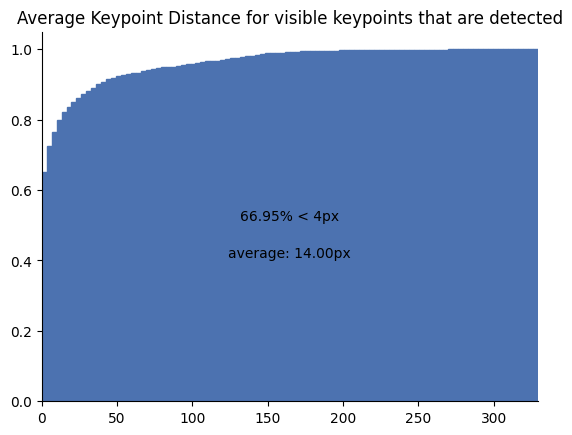

In [73]:
# also plot histogram of the averages for all channels
# make single figure
fig, ax = plt.subplots()
all_errors = np.concatenate(list(akd_dict.values()))
ax.hist(all_errors, bins=100, density=True,cumulative=True)
ax.set_title("Average Keypoint Distance for visible keypoints that are detected")
# add a number of the percentage of errors below 8
percentage = len([x for x in all_errors if x <= treshold_to_show])/len(all_errors)*100
ax.text(0.5, 0.5, f"{percentage:.2f}% < {treshold_to_show}px", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# print the average
average = np.mean(all_errors)
ax.text(0.5, 0.4, f"average: {average:.2f}px", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
# remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# make sure the x tick zero is against the y axis
ax.spines['left'].set_position(('data',0))

# no margin to right side of the x axis
plt.margins(x=0)

#change color of the bars
# get muted color pallett
import seaborn as sns
palette = sns.color_palette("deep")
color = palette[0]
for bar in ax.patches:
    bar.set_color(color)
    bar.set_edgecolor(color)


plt.show()

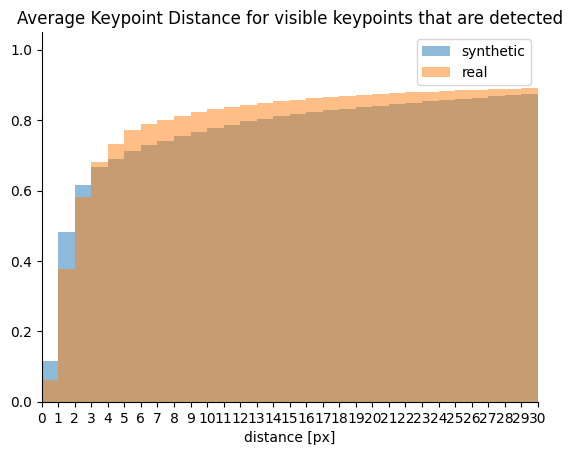

In [115]:
# plot the histograms for real and synthetic data on the same plot
# set figure size
fig, ax = plt.subplots()
all_errors = np.concatenate(list(akd_dict.values()))
all_errors_real = np.concatenate(list(akd_dict_real.values()))
all_errors_finetuned = np.concatenate(list(akd_dict_finetuned.values()))

bins = np.linspace(0, 299, 300)
ax.hist(all_errors, bins=bins, density=True,cumulative=True, alpha=0.5, label="synthetic")
ax.hist(all_errors_real, bins= bins, density=True,cumulative=True, alpha=0.5, label="real")
#ax.hist(all_errors_finetuned, bins=300, density=True,cumulative=True, alpha=0.5, label="finetuned synthetic")
ax.set_title("Average Keypoint Distance for visible keypoints that are detected")
ax.legend()

# set x range to (0, 10)
M = 30
ax.set_xlim(0, M)
ax.set_xticks(np.arange(0, M+1, 1))

# remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel("distance [px]")
plt.show()
